In [22]:
import pandas as pd
from tkinter import filedialog
from summarytools import dfSummary
import matplotlib.pyplot as plt

File path

In [23]:
# Display the dialog for browsing files
filename = filedialog.askopenfilename()

# Print the selected file path.
print(filename)

2024-11-14 23:27:47.024 python[3118:207626] +[IMKInputSession subclass]: chose IMKInputSession_Modern


/Users/andrepirex/Downloads/vehicles.csv


Create a dataframe of the CVS file

In [24]:
dataset_original=pd.read_csv(filename)

Start the Descriptive analysis

Size of the Dataset - display the number of observations and attributes

In [25]:
dataset_original.shape

(426880, 26)

Head of dataset - display the first 5 rows of the dataset

In [26]:
dataset_original.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Type of the attributes - display the categories of data for each feature

In [27]:
dataset_original.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

Localization Measures - display the some statistical measures for numerical attributes

In [28]:
dataset_original.describe().map(lambda x: f"{x:0.1f}") #round the decimals up to 1 decimal 

,id,price,year,odometer,county,lat,long
count,426880.0,426880.0,425675.0,422480.0,0.0,420331.0,420331.0
mean,7311486634.2,75199.0,2011.2,98043.3,nan,38.5,-94.7
std,4473170.4,12182282.2,9.5,213881.5,nan,5.8,18.4
min,7207408119.0,0.0,1900.0,0.0,nan,-84.1,-159.8
25%,7308143339.2,5900.0,2008.0,37704.0,nan,34.6,-111.9
50%,7312620821.0,13950.0,2013.0,85548.0,nan,39.2,-88.4
75%,7315253543.5,26485.8,2017.0,133542.5,nan,42.4,-80.8
max,7317101084.0,3736928711.0,2022.0,10000000.0,nan,82.4,173.9


Exploratory Data Analysis (EDA) with summarytools library -  display to frequency of the values in the dataset, number of missing values, plot data, and other statistics

In [29]:
dfSummary(dataset_original)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 7311486634.2 (4473170.4)min < med < max:7207408119.0 < 7312620821.0 < 7317101084.0IQR (CV) : 7110204.2 (1634.5),"426,880 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB00lEQVR4nO3ZTWrCUBiF4e+2Nk0c3EsIZBPdQRbhYruEDlyBO3AmSIj4E6omHZSWdmBrQqye8j7TcPAbvAghrm1bA27d3bUPAM4xuvYB+D+cc4mZRT3nr23b7k49JFQMwjmXZFk28d6nffar1ap0zj2fipVQMZTIe58WRbELIdRdhlVVxdPpNF0ul5GZESouL4RQ53m+7TFNfnrIyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjK59AG6Hcy4xs6jn3DdN8zDkPV8RKszsPdIsyybe+7TPfr/fx8fj8amu6xcz2w58HqHiU+S9T4ui2IUQ6q7j+Xyezmaz8eFwuL/EcYSKb0IIdZ7nnf8Ry7JMLnHPB16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeHXL1POudjMHv/gFlyXb5pmVFVV3Ge8Xq9jM7PNZhMvFotxl+05v/kGkAVQzk4i7JcAAAAASUVORK5CYII="">",0(0.0%)
2,url[object],1. https://wyoming.craigslist.org2. https://wyoming.craigslist.org3. https://wyoming.craigslist.org4. https://wyoming.craigslist.org5. https://wyoming.craigslist.org6. https://wyoming.craigslist.org7. https://wyoming.craigslist.org8. https://wyoming.craigslist.org9. https://wyoming.craigslist.org10. https://wyoming.craigslist.org11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)426,870 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,region[object],1. columbus2. jacksonville3. spokane / coeur d'alene4. eugene5. fresno / madera6. orlando7. omaha / council bluffs8. bend9. new hampshire10. kennewick-pasco-richland11. other,"3,608 (0.8%)3,562 (0.8%)2,988 (0.7%)2,985 (0.7%)2,983 (0.7%)2,983 (0.7%)2,982 (0.7%)2,982 (0.7%)2,981 (0.7%)2,981 (0.7%)395,845 (92.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADe0lEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1IE14FEvijknCpFiimuhsnXf1mcz+cBhad7PwD/D7GRERsZsZERGxmxkREbGbGRERuZxRjjZYwxzufz252fhQe33Gw2r2OMsVgsvguOr/Q0TdN6mqb1GOP53g/DY/PNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxklvM8Hy9//rjrk/DwbBDILPyXWVS82chYV5GxriLj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJDxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELGNxsZP6NkrKvIWFeR8c1GRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMa+FkrKvIeLORMXghY/BCxtEHGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyroWTMXgh481GxuCFjMELGUcfZMR

Normalize Data

In [30]:
dataset_original['manufacturer']=dataset_original['manufacturer'].str.lower()
dataset_original['model']=dataset_original['model'].str.lower()
dataset_original['type']=dataset_original['type'].str.lower()

Replace Missing values

'type' attribute
Goal: create a table with the most commom type of each manufacturer and model

In [31]:
Type_Table=dataset_original[['manufacturer','model', 'type']].dropna().reset_index(drop=True)
Type_Table['MostCommon']=Type_Table.groupby(['manufacturer','model']).cumcount()+1
Type_Table=Type_Table.sort_values(by='MostCommon',ascending=False).reset_index(drop=True)
Type_Table=Type_Table.drop_duplicates(['manufacturer','model']).reset_index(drop=True).drop(['MostCommon'], axis=1)
Type_Table['UniqueReference']=Type_Table['manufacturer'] + Type_Table['model']
Type_Table=Type_Table.drop(['manufacturer','model'],axis=1)
Type_Table

,type,UniqueReference
0,pickup,fordf-150
1,truck,chevroletsilverado 1500
2,pickup,ram1500
3,sedan,toyotacamry
4,sedan,hondaaccord
...,...,...
20966,coupe,lincolnmark iii
20967,coupe,mazdarx& gls sport
20968,wagon,bmw328d xdrive
20969,truck,ram1500 laramie 4dr cre


Detect the duplicates

Count the number of duplicate rows

In [32]:
Number_of_Duplicates = len(dataset_original)-len(dataset_original.drop_duplicates())
print(Number_of_Duplicates)

0


###### There are no duplicates entries, however the same car may be listed in multiple websites because the owners listed it for sell in different states or regions. These situations are easielly identified by counting the VIN of the vehicle.  For example VIN "1FMJU1JT1HEA52352", is counted more than one time, so the car is posted in multiple adds in different states or regions.

Count number of duplicated cars by VIN

In [33]:
#group by VIN and show the frequency
dataset_original['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
3C4NJDBB3JT270398      1
1D8GU58K47W559713      1
ZACNJBC11KPK29171      1
3C4NJDBB1JT116952      1
5XXGN4A73FG370482      1
Name: count, Length: 118264, dtype: int64

Rules to solve duplicates

In [ ]:
dataset_modified=dataset_original.groupby('VIN').aggregate({'year':  lambda x: round(x.median(),0), 'manufacturer': lambda x: ' & '.join(list(set(x.astype(str)))), 'model': lambda x: ' & '.join(list(set(x.astype(str))))})
dataset_modified=dataset_modified.reset_index(level=['VIN'])
dataset_modified['UniqueReference']=dataset_modified['manufacturer'] + dataset_modified['model']
dataset_modified

,VIN,price,year,manufacturer,model,UniqueReference
0,000,12500.0,1967.0,nan,1967 mg midget,nan1967 mg midget
1,0000,28500.0,1966.0,nan,plymouth barracuda,nanplymouth barracuda
2,00000,1.0,1900.0,nan,all,nanall
3,000000,2500.0,1957.0,nan,willys wagon,nanwillys wagon
4,0000000,1.0,1900.0,nan,all,nanall
...,...,...,...,...,...,...
118259,ZN661YUA4LX344692,58991.0,2020.0,nan,maserati levante,nanmaserati levante
118260,ZN661YUL1HX236166,55900.0,2017.0,nan,maserati levante,nanmaserati levante
118261,ZN661YUL3HX198178,44985.0,2017.0,nan,maserati levante,nanmaserati levante
118262,ZN661YUS0HX263351,53995.0,2017.0,nan,maserati levante s,nanmaserati levante s


New Dataframe

In [35]:
dataset_modified=dataset_modified.merge(Type_Table, how='right', on='UniqueReference').dropna()

Filter the dataframe for the last 10 years (2014-2024)

In [36]:
pivot_df=dataset_modified[(dataset_modified['year']>=2004) & (dataset_modified['year']<=2024)]
pivot_df=pivot_df[['VIN','type','year']].groupby(['type','year']).count().reset_index(level=['type','year'])
pivot_df

,type,year,VIN
0,bus,2004.0,2
1,bus,2005.0,4
2,bus,2006.0,7
3,bus,2007.0,3
4,bus,2008.0,2
...,...,...,...
228,wagon,2017.0,345
229,wagon,2018.0,405
230,wagon,2019.0,235
231,wagon,2020.0,148


Create the plot figure

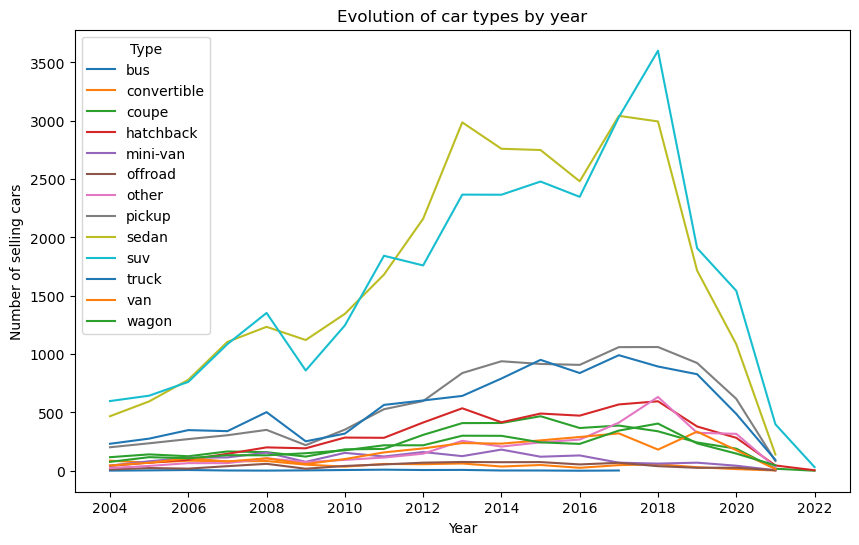

In [37]:
plt.figure(figsize=(10,6))
for vehicle_type, group in pivot_df.groupby('type'):
    plt.plot(group['year'], group['VIN'], label=vehicle_type)
plt.xlabel('Year')
plt.ylabel('Number of selling cars')
plt.xticks(range(2004, 2024, 2))
plt.title('Evolution of car types by year')
plt.legend(title='Type')
plt.show()